In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv("FastagFraudDetection.csv")

In [3]:
data.head(10)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud
6,7,1/12/2023 15:40,SUV,FTG-707-JKL-210,B-102,Express,Large,180,160,"13.059816123454882, 77.77068662374292",70,KA22MN4567,Fraud
7,8,1/13/2023 20:15,Bus,FTG-088-UVW-543,C-103,Regular,Large,350,90,"13.059816123454882, 77.77068662374292",88,KA21OP8901,Fraud
8,9,1/14/2023 1:55,Car,FTG-909-RST-876,A-101,Express,Small,120,0,"13.059816123454882, 77.77068662374292",45,KA16QR2345,Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud


In [4]:
data.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [6]:
data.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [7]:
data.isna().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [8]:
data.dtypes

Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object

In [9]:
data["Timestamp"] = pd.to_datetime(data['Timestamp'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         5000 non-null   int64         
 1   Timestamp              5000 non-null   datetime64[ns]
 2   Vehicle_Type           5000 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            5000 non-null   object        
 5   Lane_Type              5000 non-null   object        
 6   Vehicle_Dimensions     5000 non-null   object        
 7   Transaction_Amount     5000 non-null   int64         
 8   Amount_paid            5000 non-null   int64         
 9   Geographical_Location  5000 non-null   object        
 10  Vehicle_Speed          5000 non-null   int64         
 11  Vehicle_Plate_Number   5000 non-null   object        
 12  Fraud_indicator        5000 non-null   object        
dtypes: 

In [11]:
data['Fraud_indicator'].unique()

array(['Fraud', 'Not Fraud'], dtype=object)

In [12]:
data = data.drop(['FastagID'], axis=1)

In [13]:
encoded_data = data.copy()

In [14]:
numerical_columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
categorical_columns = ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 
                       'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator']

le = LabelEncoder()

for col in categorical_columns:
    encoded_data[col] = le.fit_transform(encoded_data[col].astype(str))
    
Q1 = encoded_data[numerical_columns].quantile(0.25)
Q3 = encoded_data[numerical_columns].quantile(0.75)

IQR = Q3 - Q1

filtered_data = encoded_data[~((encoded_data[numerical_columns] < (Q1 - 1.5 * IQR)) | (encoded_data[numerical_columns]>(Q3 + 1.5*IQR))).any(axis=1)]

In [15]:
missing_values = data.isnull().sum()

missing_values, filtered_data.head()

(Transaction_ID           0
 Timestamp                0
 Vehicle_Type             0
 TollBoothID              0
 Lane_Type                0
 Vehicle_Dimensions       0
 Transaction_Amount       0
 Amount_paid              0
 Geographical_Location    0
 Vehicle_Speed            0
 Vehicle_Plate_Number     0
 Fraud_indicator          0
 dtype: int64,
    Transaction_ID           Timestamp  Vehicle_Type  TollBoothID  Lane_Type  \
 0               1 2023-01-06 11:20:00             0            0          0   
 1               2 2023-01-07 14:55:00             1            1          1   
 2               3 2023-01-08 18:25:00             2            3          1   
 3               4 2023-01-09 02:05:00             5            2          1   
 4               5 2023-01-10 06:35:00             6            1          0   
 
    Vehicle_Dimensions  Transaction_Amount  Amount_paid  Geographical_Location  \
 0                   0                 350          120                      3   
 1 

In [16]:
filtered_data.head()

,Transaction_ID,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,2023-01-06 11:20:00,0,0,0,0,350,120,3,65,1482,0
1,2,2023-01-07 14:55:00,1,1,1,2,120,100,3,78,3066,0
2,3,2023-01-08 18:25:00,2,3,1,2,0,0,3,53,3663,1
3,4,2023-01-09 02:05:00,5,2,1,0,350,120,3,92,1498,0
4,5,2023-01-10 06:35:00,6,1,0,1,140,100,3,60,2409,0


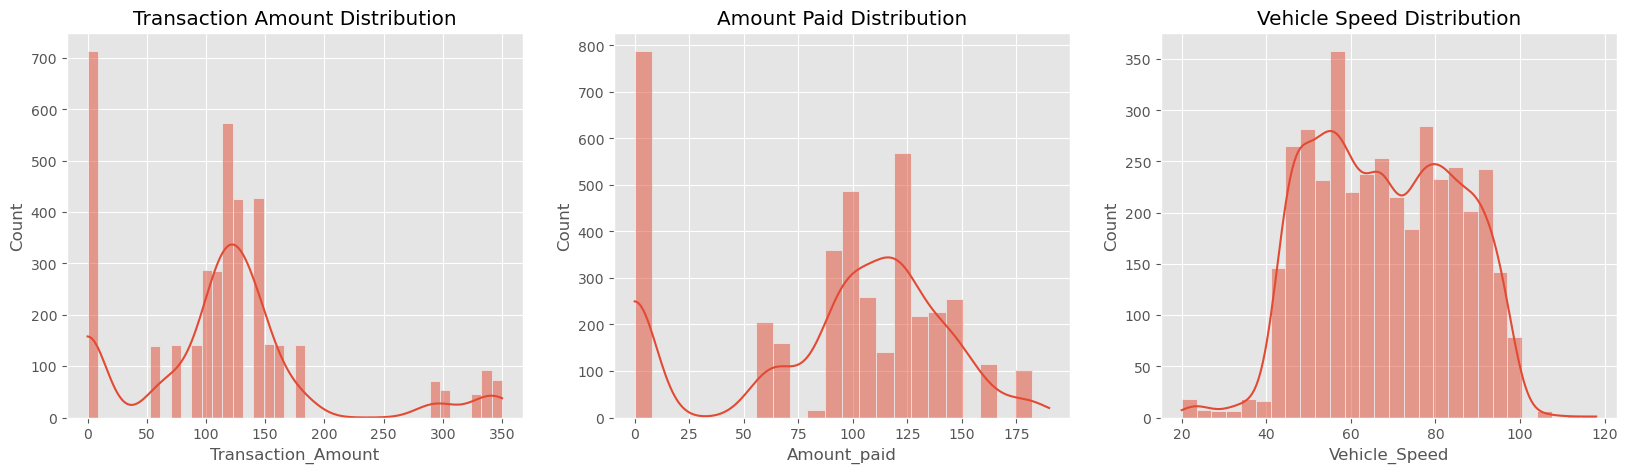

In [17]:
plt.style.use('ggplot')

numerical_summary = filtered_data.describe()

fig, axes = plt.subplots(1, 3, figsize = (20,5))

sns.histplot(filtered_data['Transaction_Amount'], ax = axes[0],kde = True)
axes[0].set_title('Transaction Amount Distribution')

sns.histplot(filtered_data['Amount_paid'], ax = axes[1],kde = True)
axes[1].set_title('Amount Paid Distribution')

sns.histplot(filtered_data['Vehicle_Speed'], ax = axes[2],kde = True)
axes[2].set_title('Vehicle Speed Distribution')

plt.show()

C:\Users\Siddhanth\AppData\Local\Temp\ipykernel_35260\137865138.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = filtered_data.corr()


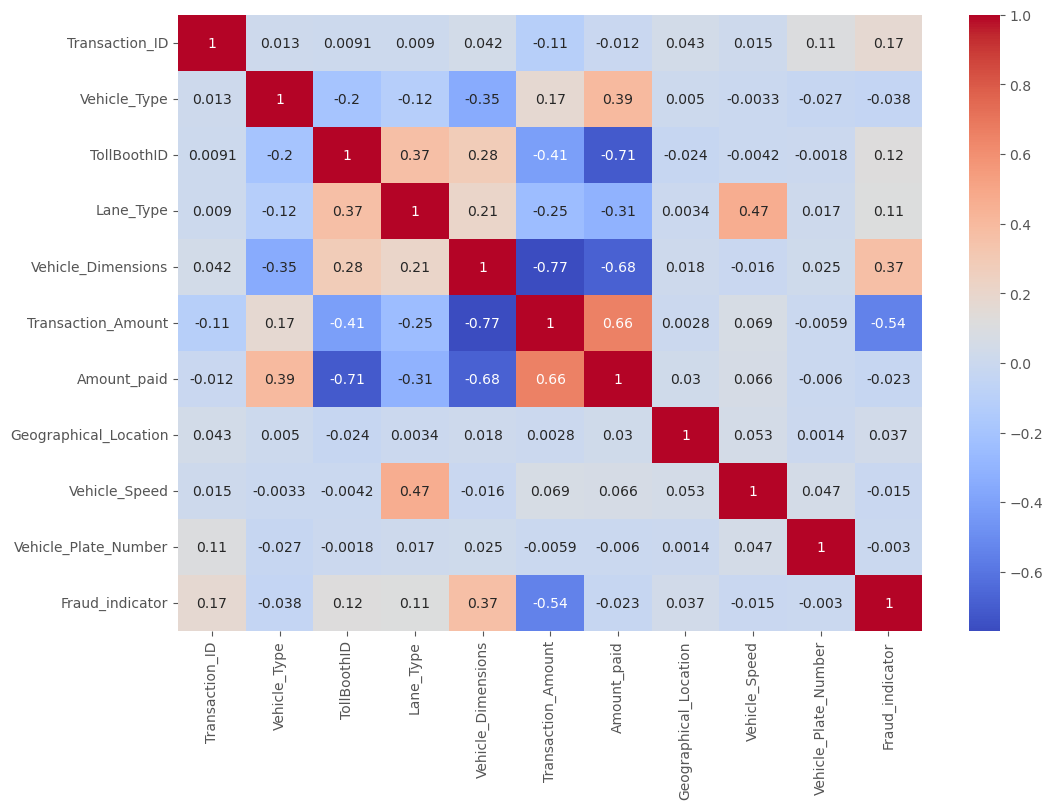

In [18]:
corr = filtered_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [19]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,2023-01-06 11:20:00,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,2023-01-07 14:55:00,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,2023-01-08 18:25:00,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,2023-01-09 02:05:00,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,2023-01-10 06:35:00,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [30]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,DayOfWeek,Month
0,1,2023-01-06 11:20:00,0,0,0,0,350,120,3,65,1482,0,11,4,1
1,2,2023-01-07 14:55:00,1,1,1,2,120,100,3,78,3066,0,14,5,1
2,3,2023-01-08 18:25:00,2,3,1,2,0,0,3,53,3663,1,18,6,1
3,4,2023-01-09 02:05:00,5,2,1,0,350,120,3,92,1498,0,2,0,1
4,5,2023-01-10 06:35:00,6,1,0,1,140,100,3,60,2409,0,6,1,1


In [20]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month

categorical_columns = ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 
                       'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator']
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))
    
X = data.drop(['Fraud_indicator', 'Timestamp'], axis=1)
Y = data['Fraud_indicator']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, Y)
mi = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi})
print(mi)

                  Feature  Mutual_Information
0          Transaction_ID            0.018340
1            Vehicle_Type            0.007830
2             TollBoothID            0.030852
3               Lane_Type            0.000000
4      Vehicle_Dimensions            0.012193
5      Transaction_Amount            0.015890
6             Amount_paid            0.076640
7   Geographical_Location            0.000000
8           Vehicle_Speed            0.007486
9    Vehicle_Plate_Number            0.001801
10                   Hour            0.003408
11              DayOfWeek            0.004493
12                  Month            0.004798


Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train_scaled, Y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test_scaled)[:,1]

c:\Users\Siddhanth\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 0.89
Precision: 0.89
Recall: 0.98
F1 Score: 0.93
AUC-ROC: 0.98


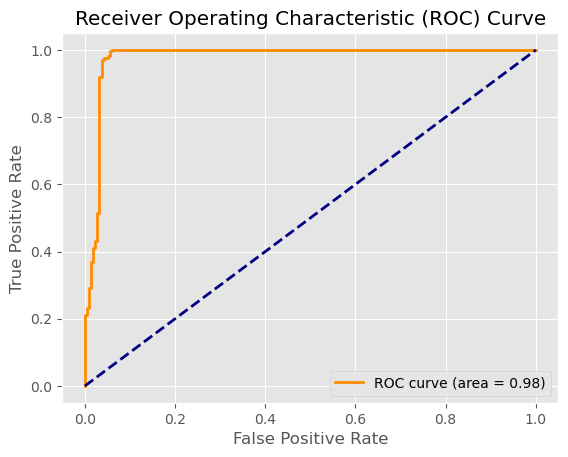

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
auc_roc = roc_auc_score(Y_test,y_pred_proba)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree

Accuracy: 0.80
Precision: 0.79
Recall: 1.00
F1 Score: 0.89
AUC-ROC: 0.97


c:\Users\Siddhanth\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


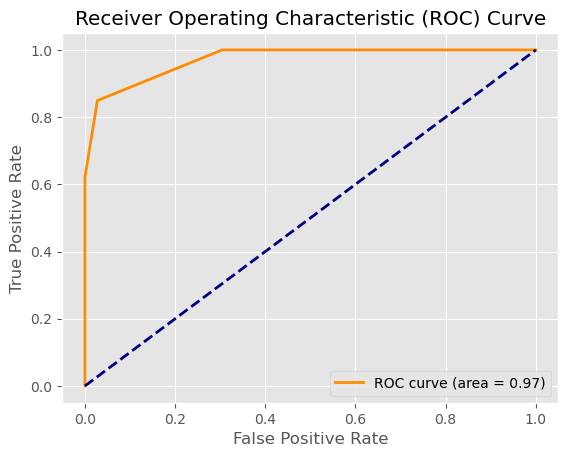

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train_scaled, Y_train)

y_pred_dt = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test_scaled)[:,1]

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

accuracy = accuracy_score(Y_test, y_pred_dt)
precision = precision_score(Y_test, y_pred_dt)
recall = recall_score(Y_test, y_pred_dt)
f1 = f1_score(Y_test, y_pred_dt)
auc_roc = roc_auc_score(Y_test,y_pred_proba)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Naive Baiss


Accuracy: 0.80
Precision: 0.90
Recall: 0.84
F1 Score: 0.87
AUC-ROC: 0.86


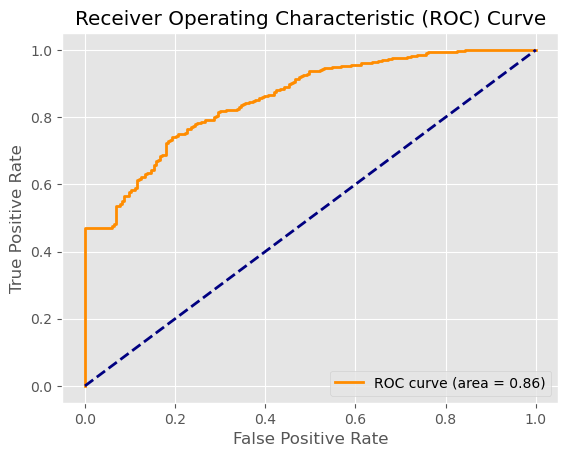

In [27]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
gnb = GaussianNB()

# Model training
gnb = gnb.fit(X_train_scaled, Y_train)

y_pred_dt = gnb.predict(X_test_scaled)
y_pred_proba = gnb.predict_proba(X_test_scaled)[:,1]

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

accuracy = accuracy_score(Y_test, y_pred_dt)
precision = precision_score(Y_test, y_pred_dt)
recall = recall_score(Y_test, y_pred_dt)
f1 = f1_score(Y_test, y_pred_dt)
auc_roc = roc_auc_score(Y_test,y_pred_proba)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.84
Precision: 0.85
Recall: 0.97
F1 Score: 0.91
AUC-ROC: 0.79


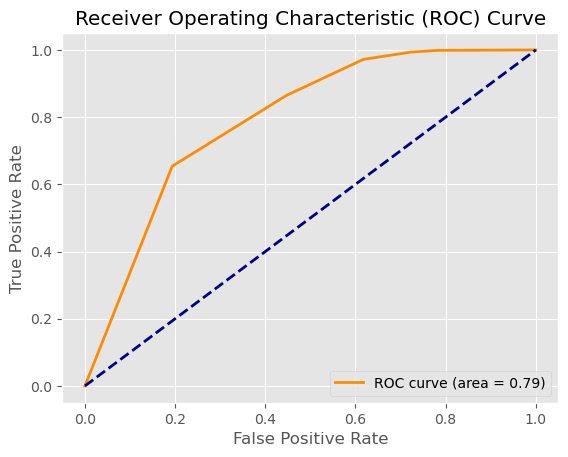

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, Y_train)

y_pred_dt = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]

accuracy = accuracy_score(Y_test, y_pred_dt)
precision = precision_score(Y_test, y_pred_dt)
recall = recall_score(Y_test, y_pred_dt)
f1 = f1_score(Y_test, y_pred_dt)
auc_roc = roc_auc_score(Y_test,y_pred_proba)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:
cm = confusion_matrix(Y_test, y_pred_dt)
cm

array([[ 83, 134],
       [ 22, 761]], dtype=int64)